# How to use a Functional Map Model

Here we show how to instantiate a deep functional map model. We introduce this notion as a model that can compute, given a pair of shapes, a functional maps ina  differentiable manner, using learned descriptors.

In [1]:
from geomfum.dataset import NotebooksDataset
from geomfum.descriptor.learned import FeatureExtractor
from geomfum.forward_functional_map import ForwardFunctionalMap
from geomfum.learning.models import FMNet
from geomfum.shape import TriangleMesh


In [2]:
dataset = NotebooksDataset()

mesh_a = TriangleMesh.from_file(dataset.get_filename("cat-00"))
mesh_b = TriangleMesh.from_file(dataset.get_filename("lion-00"))

In [3]:
mesh_a.laplacian.find_spectrum(spectrum_size=100, set_as_basis=True)
mesh_b.laplacian.find_spectrum(spectrum_size=100, set_as_basis=True)

mesh_a.basis.use_k = 20
mesh_b.basis.use_k = 20


In [8]:
fumctional_map_model = FMNet(
    feature_extractor=FeatureExtractor.from_registry(which="diffusionnet")
)

output = fumctional_map_model(mesh_a, mesh_b, as_dict=True)
fmap12, fmap21 = output["fmap12"], output["fmap21"]

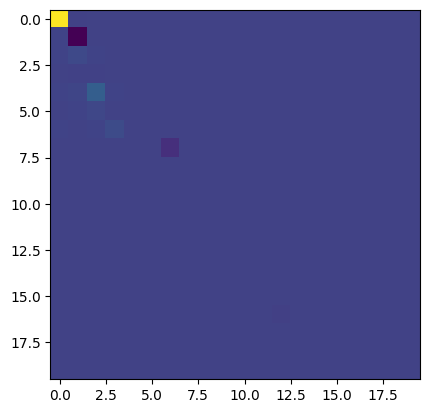

In [9]:
import matplotlib.pyplot as plt

plt.imshow(fmap12)

We can select specific modules for our network

In [10]:
fmap_module = ForwardFunctionalMap(1000, 1, False)

feature_extractor = FeatureExtractor.from_registry(which="diffusionnet")

fumctional_map_model = FMNet(
    feature_extractor=feature_extractor, fmap_module=fmap_module
)

fmap12, fmap21 = fumctional_map_model(mesh_a, mesh_b)


TypeError: Image data of dtype <U6 cannot be converted to float

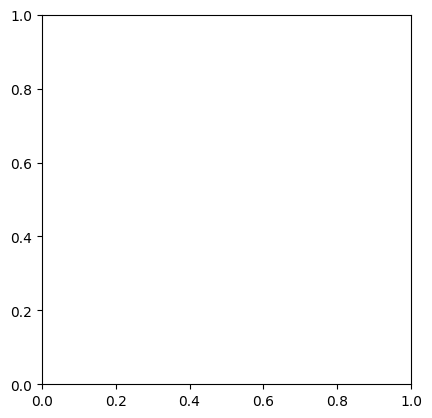

In [11]:
import matplotlib.pyplot as plt

plt.imshow(fmap12)